In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pandas as pd
from math import log

In [24]:
datos = pd.read_csv("../db/datos.csv")
datos["Suma de DESEMBOLSO_NETO_LOG"] = np.log(datos["Suma de DESEMBOLSO_NETO"])

datos.head(4)


,TIPO_CREDITO,TIPO_CLIENTE,Año,Mes,TIPO_PAGO,Suma de DESEMBOLSO_NETO,TPP Cosecha Mensual,Suma de DESEMBOLSO_NETO_LOG
0,NUEVO,EXISTENTE,2022,enero,PAGO VOLUNTARIO,1748400.0,17.52,14.374212
1,NUEVO,EXISTENTE,2022,febrero,PAGO VOLUNTARIO,160000.0,20.13,11.982929
2,NUEVO,EXISTENTE,2022,marzo,PAGO VOLUNTARIO,2339200.0,17.69,14.665320
3,NUEVO,EXISTENTE,2022,abril,PAGO VOLUNTARIO,598600.0,16.46,13.302349


In [25]:
tipos_clientes = datos["TIPO_CLIENTE"].unique().tolist()

existente  = datos[datos["TIPO_CLIENTE"] == tipos_clientes[0]]
nuveo = datos[datos["TIPO_CLIENTE"] == tipos_clientes[1]]
reactivado = datos[datos["TIPO_CLIENTE"] == tipos_clientes[2]]

In [26]:
existente.head(3)

,TIPO_CREDITO,TIPO_CLIENTE,Año,Mes,TIPO_PAGO,Suma de DESEMBOLSO_NETO,TPP Cosecha Mensual,Suma de DESEMBOLSO_NETO_LOG
0,NUEVO,EXISTENTE,2022,enero,PAGO VOLUNTARIO,1748400.0,17.52,14.374212
1,NUEVO,EXISTENTE,2022,febrero,PAGO VOLUNTARIO,160000.0,20.13,11.982929
2,NUEVO,EXISTENTE,2022,marzo,PAGO VOLUNTARIO,2339200.0,17.69,14.665320


In [27]:
p1 = 25
p2 = 28
p3 = 30

## Existente

In [28]:
# Variables independientes (X) y dependientes (y)
X = np.array(existente[" TPP Cosecha Mensual"]).reshape(-1, 1)
Y_log = np.array(existente["Suma de DESEMBOLSO_NETO_LOG"])

# Dividir datos en entrenamiento y prueba
X_train, X_test, Y_train_log, Y_test_log = train_test_split(X, Y_log, test_size=0.2, random_state=42)

# Variables para almacenar resultados
mejor_grado = 0
mejor_error = float('inf')
errores = []

# Probar diferentes grados de polinomio
grados = range(1, 6)  # Cambia el rango si necesitas más grados
for grado in grados:
    # Transformar características polinomiales
    carac_polinomiales = PolynomialFeatures(degree=grado)
    X_train_poli = carac_polinomiales.fit_transform(X_train)
    X_test_poli = carac_polinomiales.transform(X_test)

    # Crear y ajustar modelo
    modelo = LinearRegression()
    modelo.fit(X_train_poli, Y_train_log)

    # Predecir en datos de prueba
    Y_pred_log = modelo.predict(X_test_poli)

    # Calcular error de testeo
    error = mean_squared_error(Y_test_log, Y_pred_log)
    errores.append(error)

    # Verificar si este grado tiene el menor error
    if error < mejor_error:
        mejor_error = error
        mejor_grado = grado
        mejor_modelo = modelo
        mejor_carac_polinomiales = carac_polinomiales

# Mostrar resultados
print(f"Mejor grado del polinomio: {mejor_grado} con error MSE: {mejor_error}")

# Ajustar modelo final con el mejor grado
X_poli = mejor_carac_polinomiales.fit_transform(X)
mejor_modelo.fit(X_poli, Y_log)

# Obtener predicciones destransformadas
Y_pred_log = mejor_modelo.predict(X_poli)
Y_pred = np.exp(Y_pred_log)  # Destransformar

Mejor grado del polinomio: 2 con error MSE: 1.4046424033418405


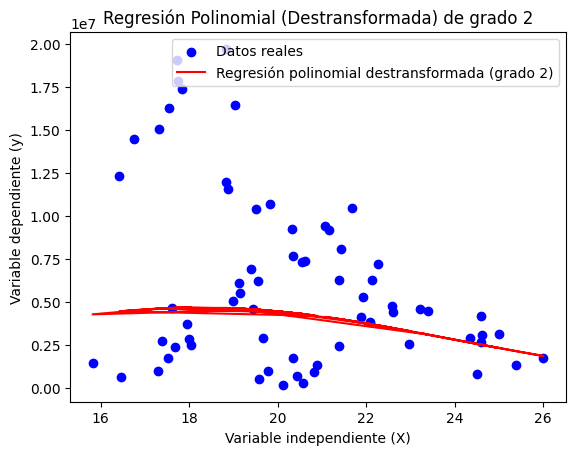

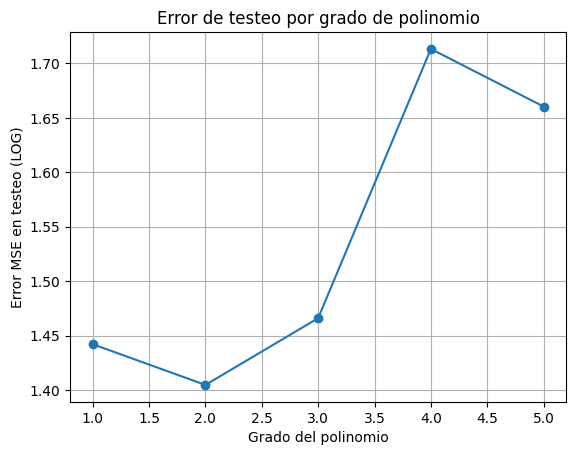

In [29]:
# Graficar resultados destransformados
plt.scatter(X, existente["Suma de DESEMBOLSO_NETO"], color='blue', label='Datos reales')
plt.plot(X, Y_pred, color='red', label=f'Regresión polinomial destransformada (grado {mejor_grado})')
plt.xlabel('Variable independiente (X)')
plt.ylabel('Variable dependiente (y)')
plt.legend()
plt.title(f'Regresión Polinomial (Destransformada) de grado {mejor_grado}')
plt.show()

# Gráfico de errores por grado
plt.plot(grados, errores, marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error MSE en testeo (LOG)')
plt.title('Error de testeo por grado de polinomio')
plt.grid()
plt.show()

In [30]:
# Mostrar ecuación destransformada
coeficientes = mejor_modelo.coef_
terminos_log = [f"{coef:.3f} * x^{i}" if i > 0 else f"{coef:.3f}" 
                for i, coef in enumerate(coeficientes)]
ecuacion_log = " + ".join(terminos_log)

# Construir la ecuación destransformada
ecuacion_destransformada = f"y = exp({ecuacion_log})"

print(f"Ecuación del modelo destransformada: {ecuacion_destransformada}")


Ecuación del modelo destransformada: y = exp(0.000 + 0.560 * x^1 + -0.015 * x^2)


In [31]:
from math import exp
t1 = exp(0.56*p1 - 0.015*p1**2)

t2 = exp(0.56*p2 - 0.015*p2**2)

t3 = exp(0.56*p3 - 0.015*p3**2)

total = t1*3 + t2*3 + t3*6

## Nuevo

In [32]:
# Variables independientes (X) y dependientes (y)
X = np.array(nuveo[" TPP Cosecha Mensual"]).reshape(-1, 1)
Y_log = np.array(nuveo["Suma de DESEMBOLSO_NETO_LOG"])

# Dividir datos en entrenamiento y prueba
X_train, X_test, Y_train_log, Y_test_log = train_test_split(X, Y_log, test_size=0.2, random_state=42)

# Variables para almacenar resultados
mejor_grado = 0
mejor_error = float('inf')
errores = []

# Probar diferentes grados de polinomio
grados = range(1, 6)  # Cambia el rango si necesitas más grados
for grado in grados:
    # Transformar características polinomiales
    carac_polinomiales = PolynomialFeatures(degree=grado)
    X_train_poli = carac_polinomiales.fit_transform(X_train)
    X_test_poli = carac_polinomiales.transform(X_test)

    # Crear y ajustar modelo
    modelo = LinearRegression()
    modelo.fit(X_train_poli, Y_train_log)

    # Predecir en datos de prueba
    Y_pred_log = modelo.predict(X_test_poli)

    # Calcular error de testeo
    error = mean_squared_error(Y_test_log, Y_pred_log)
    errores.append(error)

    # Verificar si este grado tiene el menor error
    if error < mejor_error:
        mejor_error = error
        mejor_grado = grado
        mejor_modelo = modelo
        mejor_carac_polinomiales = carac_polinomiales

# Mostrar resultados
print(f"Mejor grado del polinomio: {mejor_grado} con error MSE: {mejor_error}")

# Ajustar modelo final con el mejor grado
X_poli = mejor_carac_polinomiales.fit_transform(X)
mejor_modelo.fit(X_poli, Y_log)

# Obtener predicciones destransformadas
Y_pred_log = mejor_modelo.predict(X_poli)
Y_pred = np.exp(Y_pred_log)  # Destransformar

Mejor grado del polinomio: 3 con error MSE: 2.128688227275546


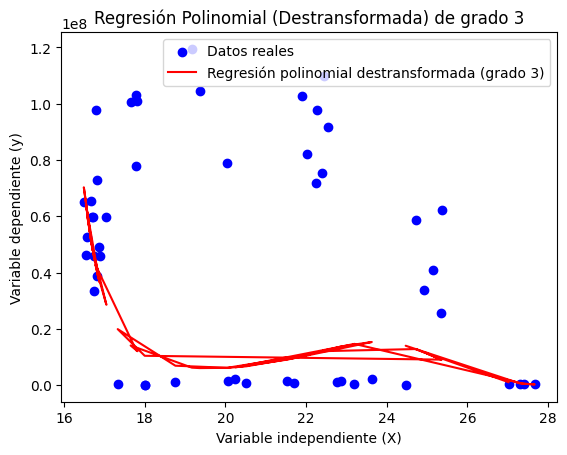

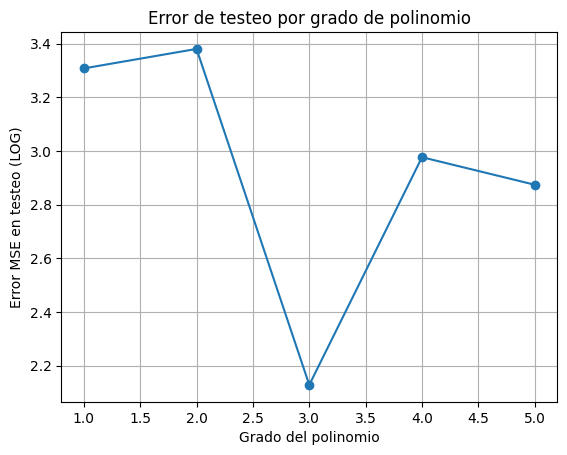

In [33]:
# Graficar resultados destransformados
plt.scatter(X, nuveo["Suma de DESEMBOLSO_NETO"], color='blue', label='Datos reales')
plt.plot(X, Y_pred, color='red', label=f'Regresión polinomial destransformada (grado {mejor_grado})')
plt.xlabel('Variable independiente (X)')
plt.ylabel('Variable dependiente (y)')
plt.legend()
plt.title(f'Regresión Polinomial (Destransformada) de grado {mejor_grado}')
plt.show()

# Gráfico de errores por grado
plt.plot(grados, errores, marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error MSE en testeo (LOG)')
plt.title('Error de testeo por grado de polinomio')
plt.grid()
plt.show()

In [34]:
# Mostrar ecuación destransformada
coeficientes = mejor_modelo.coef_
terminos_log = [f"{coef:.3f} * x^{i}" if i > 0 else f"{coef:.3f}" 
                for i, coef in enumerate(coeficientes)]
ecuacion_log = " + ".join(terminos_log)

# Construir la ecuación destransformada
ecuacion_destransformada = f"y = exp({ecuacion_log})"

print(f"Ecuación del modelo destransformada: {ecuacion_destransformada}")


Ecuación del modelo destransformada: y = exp(0.000 + -37.515 * x^1 + 1.745 * x^2 + -0.027 * x^3)


In [35]:
from math import exp
t1 = exp(-37.515*p1 + 1.745*p1**2 - 0.027*p1**3)

t2 = exp(-37.515*p2 + 1.745*p2**2 - 0.027*p2**3)

t3 = exp(-37.515*p3 + 1.745*p3**2 - 0.027*p3**3)

total_nuevo = t1*3 + t2*3 + t3*6
total_nuevo

3.9699487156373564e-117

## Reactivado

In [36]:
# Variables independientes (X) y dependientes (y)
X = np.array(reactivado[" TPP Cosecha Mensual"]).reshape(-1, 1)
Y_log = np.array(reactivado["Suma de DESEMBOLSO_NETO_LOG"])

# Dividir datos en entrenamiento y prueba
X_train, X_test, Y_train_log, Y_test_log = train_test_split(X, Y_log, test_size=0.2, random_state=42)

# Variables para almacenar resultados
mejor_grado = 0
mejor_error = float('inf')
errores = []

# Probar diferentes grados de polinomio
grados = range(1, 6)  # Cambia el rango si necesitas más grados
for grado in grados:
    # Transformar características polinomiales
    carac_polinomiales = PolynomialFeatures(degree=grado)
    X_train_poli = carac_polinomiales.fit_transform(X_train)
    X_test_poli = carac_polinomiales.transform(X_test)

    # Crear y ajustar modelo
    modelo = LinearRegression()
    modelo.fit(X_train_poli, Y_train_log)

    # Predecir en datos de prueba
    Y_pred_log = modelo.predict(X_test_poli)

    # Calcular error de testeo
    error = mean_squared_error(Y_test_log, Y_pred_log)
    errores.append(error)

    # Verificar si este grado tiene el menor error
    if error < mejor_error:
        mejor_error = error
        mejor_grado = grado
        mejor_modelo = modelo
        mejor_carac_polinomiales = carac_polinomiales

# Mostrar resultados
print(f"Mejor grado del polinomio: {mejor_grado} con error MSE: {mejor_error}")

# Ajustar modelo final con el mejor grado
X_poli = mejor_carac_polinomiales.fit_transform(X)
mejor_modelo.fit(X_poli, Y_log)

# Obtener predicciones destransformadas
Y_pred_log = mejor_modelo.predict(X_poli)
Y_pred = np.exp(Y_pred_log)  # Destransformar

Mejor grado del polinomio: 1 con error MSE: 3.6156926083276546


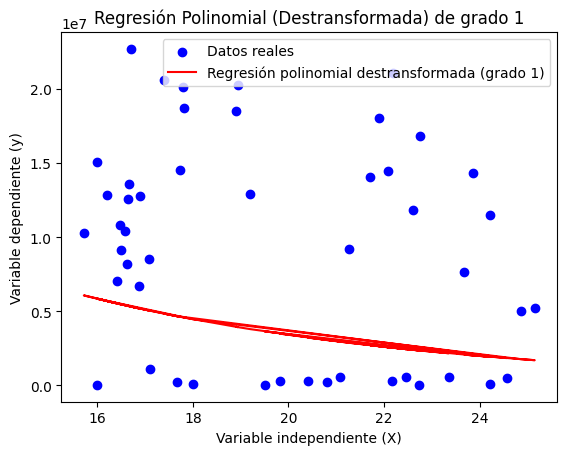

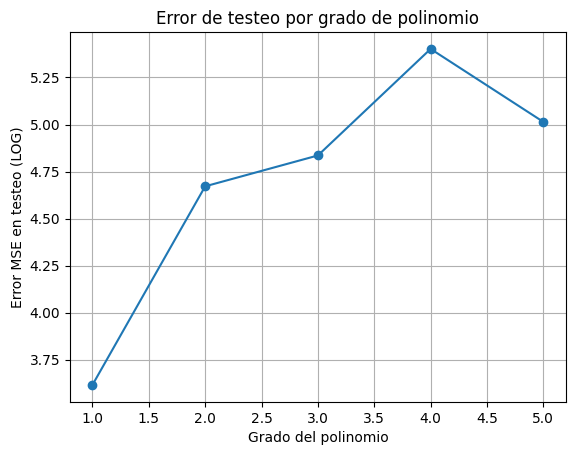

In [37]:
# Graficar resultados destransformados
plt.scatter(X, reactivado["Suma de DESEMBOLSO_NETO"], color='blue', label='Datos reales')
plt.plot(X, Y_pred, color='red', label=f'Regresión polinomial destransformada (grado {mejor_grado})')
plt.xlabel('Variable independiente (X)')
plt.ylabel('Variable dependiente (y)')
plt.legend()
plt.title(f'Regresión Polinomial (Destransformada) de grado {mejor_grado}')
plt.show()

# Gráfico de errores por grado
plt.plot(grados, errores, marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error MSE en testeo (LOG)')
plt.title('Error de testeo por grado de polinomio')
plt.grid()
plt.show()

In [38]:
# Mostrar ecuación destransformada
coeficientes = mejor_modelo.coef_
terminos_log = [f"{coef:.3f} * x^{i}" if i > 0 else f"{coef:.3f}" 
                for i, coef in enumerate(coeficientes)]
ecuacion_log = " + ".join(terminos_log)

# Construir la ecuación destransformada
ecuacion_destransformada = f"y = exp({ecuacion_log})"

print(f"Ecuación del modelo destransformada: {ecuacion_destransformada}")


Ecuación del modelo destransformada: y = exp(0.000 + -0.135 * x^1)


In [39]:
from math import exp
t1 = exp(-0.135*p1)

t2 = exp(-0.135*p2)

t3 = exp(-0.135*p3)

total_reactivado = t1*3 + t2*3 + t3*6
total_reactivado

0.275656677047238

In [40]:
print(f"Con precios de {p1}% en T1, {p2}% en T2 y {p3}% en Segundo Semestre,")
print(f"se llega a {total} de desembolso.")

Con precios de 25% en T1, 28% en T2 y 30% en Segundo Semestre,
se llega a 619.8854871062438 de desembolso.
